In [79]:
import random
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import os
import json
from PIL import Image, ImageOps
from scipy.io import wavfile

In [2]:
# Q1

In [3]:
#a

In [71]:
# function to normalize the image data
def Normalize_image(data):
  return [[(pixel - 127.5) / 127.5 for pixel in row] for row in data]

In [85]:
#function to plot the color vs grayscale image, unnormalized vs normalized image.
def plots_and_images(img_color1, img_gray1, norm_gray1):
    # Create a subplot for side-by-side images
    flattened_gray = [pixel for row in img_gray1 for pixel in row]
    flattened_norm_gray = [pixel for row in norm_gray1 for pixel in row]
    fig, axes = plt.subplots(2, 2, figsize=(10, 5))

    # Show color image
    axes[0,0].imshow(img_color1)
    axes[0,0].set_title('Original Color Image')
    axes[0,0].axis('off')  # Turn off axis

    # Show grayscale image (normalized)
    axes[0,1].imshow(img_gray1, cmap='gray')
    axes[0,1].set_title('Grayscale Image (Normalized)')
    axes[0,1].axis('off')  # Turn off axis


    #show histogram for unnormalized
    axes[1,0].hist(flattened_gray, bins = 256)
    axes[1,0].set_title('Unnormalized Image')
    axes[1,0].axis('on')  # Turn off axis

    #show histogram for normalized
    axes[1,1].hist(flattened_norm_gray, bins = 256)
    axes[1,1].set_title('Normalized Image')
    axes[1,1].axis('on')  # Turn off axis

    plt.ion() 
    # plt.show()
    plt.tight_layout()
    plt.show()

    # Wait for a button press
    plt.waitforbuttonpress(0)  # Wait indefinitely until a key press
    plt.close(fig)


In [5]:
def preprocess_image(image_path):
    # Load image using PIL
    img = Image.open(image_path)
    # Convert to grayscale
    img_gray = img.convert("L")
    # save data from image
    img_color_array = list(img.getdata())
    img_gray_array = list(img_gray.getdata())
    img_color_array = [img_color_array[i:i + img.width] for i in range(0, len(img_color_array), img.width)]
    img_gray_array = [img_gray_array[i:i + img_gray.width] for i in range(0, len(img_gray_array), img_gray.width)]
    return img_color_array, img_gray_array

In [21]:
#path for Data Loading
img_dir_path = "MLA2_DATA/MLA2_DATA/IMAGE"

In [36]:
# loading the directory and skipping hidden files
img_dir_files_lst = os.listdir(img_dir_path)
filtered_files_iter = iter(map(lambda x: x * (x != ".DS_Store"), img_dir_files_lst))
img_dir_files_lst = list(filter(None, filtered_files_iter))
# img_dir_files_lst

In [72]:
#Loading whole dataset and labels in lists
img_data_color = []
img_data_gray = []
img_data_gray_normalized = []
labels = []
for i in img_dir_files_lst:
    img_lst = os.listdir(f"{img_dir_path}/{i}")
    col_img_data_temp=[]
    gray_img_data_temp = []
    norm_gray_data_temp = []
    for j in img_lst:
        img_path = f"{img_dir_path}/{i}/{j}"
        col_data,gray_data = preprocess_image(img_path)
        norm_gra_data = Normalize_image(gray_data)
        col_img_data_temp.append(col_data)
        gray_img_data_temp.append(gray_data)
        norm_gray_data_temp.append(norm_gra_data)
    img_data_color.append(col_img_data_temp)
    img_data_gray.append(gray_img_data_temp)
    img_data_gray_normalized.append(norm_gray_data_temp)
    labels.append(i)

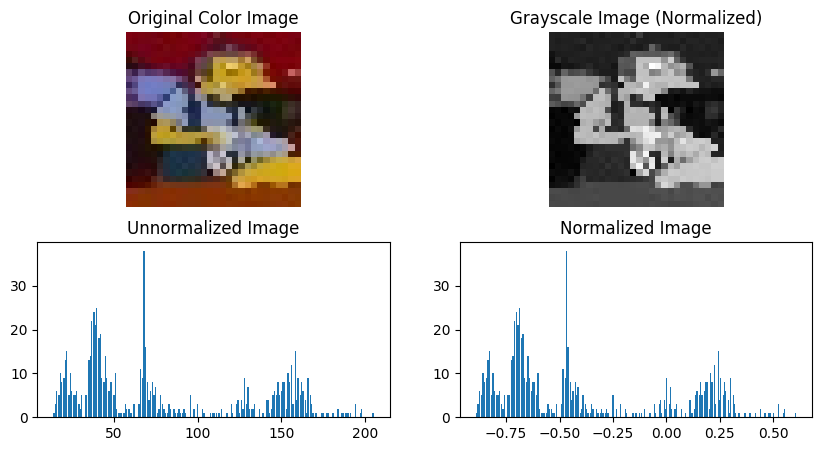

Original
[[(126, 1, 17), (121, 0, 15), (119, 4, 17), (115, 5, 16), (114, 3, 19), (112, 0, 12), (116, 1, 6), (121, 5, 8), (114, 0, 6), (123, 5, 17), (121, 0, 19), (122, 0, 23), (124, 7, 33), (104, 2, 23), (114, 34, 45), (92, 13, 19), (108, 6, 20), (118, 3, 18), (116, 5, 14), (115, 1, 9), (125, 3, 16), (126, 4, 17), (119, 2, 11), (118, 1, 10), (127, 1, 15), (125, 0, 13), (122, 1, 18), (121, 3, 19)], [(121, 3, 17), (116, 0, 15), (116, 4, 20), (115, 4, 20), (117, 6, 22), (121, 9, 21), (114, 1, 7), (117, 4, 8), (119, 3, 12), (120, 2, 14), (123, 2, 19), (120, 2, 24), (110, 2, 26), (110, 17, 38), (87, 15, 27), (85, 15, 26), (95, 11, 26), (104, 10, 26), (109, 8, 22), (113, 7, 21), (118, 6, 20), (114, 0, 11), (123, 5, 17), (124, 4, 16), (122, 0, 11), (126, 4, 17), (121, 3, 17), (114, 0, 11)], [(114, 6, 19), (113, 5, 20), (117, 3, 28), (115, 1, 26), (112, 1, 17), (110, 0, 11), (117, 10, 18), (114, 4, 13), (120, 4, 15), (123, 5, 17), (117, 1, 14), (106, 0, 14), (103, 10, 31), (88, 10, 32), (75, 1

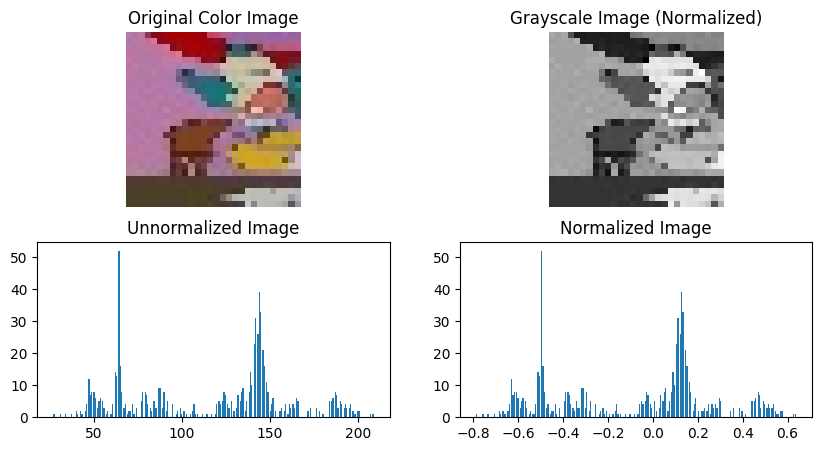

Original
[[(182, 124, 175), (178, 116, 163), (189, 122, 163), (140, 55, 86), (124, 10, 35), (141, 5, 19), (159, 4, 10), (163, 1, 0), (162, 0, 0), (163, 1, 0), (162, 1, 6), (157, 1, 12), (148, 2, 21), (197, 67, 93), (191, 76, 107), (184, 92, 131), (168, 100, 151), (153, 99, 157), (156, 101, 166), (152, 100, 162), (154, 101, 157), (152, 101, 157), (153, 103, 166), (150, 99, 166), (152, 96, 169), (159, 104, 172), (149, 98, 157), (149, 100, 155)], [(177, 117, 168), (182, 120, 167), (187, 120, 161), (193, 113, 148), (219, 119, 147), (133, 11, 32), (145, 7, 20), (153, 6, 12), (161, 9, 8), (160, 2, 1), (165, 2, 5), (158, 0, 5), (154, 2, 17), (146, 7, 26), (141, 15, 37), (112, 17, 47), (150, 100, 138), (140, 113, 158), (141, 113, 161), (138, 105, 152), (151, 106, 147), (153, 100, 144), (160, 102, 153), (162, 99, 156), (166, 98, 157), (164, 96, 153), (165, 98, 149), (164, 101, 148)], [(184, 121, 168), (182, 119, 164), (183, 120, 163), (186, 119, 160), (191, 115, 153), (199, 112, 146), (218, 114

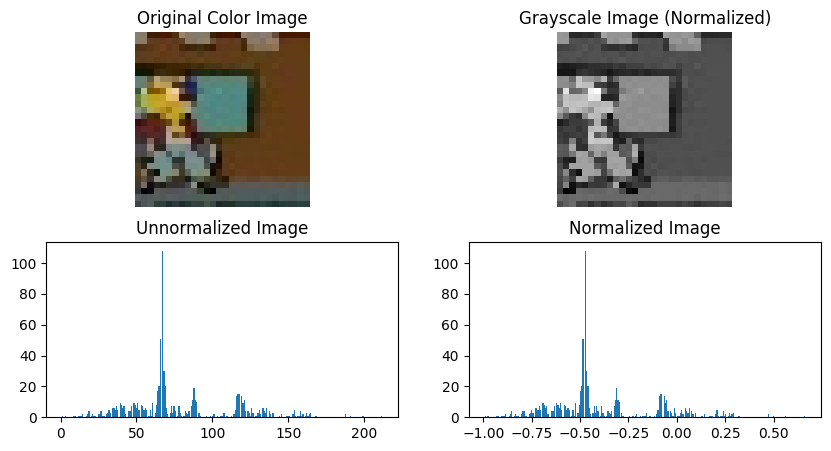

Original
[[(133, 126, 110), (135, 122, 103), (59, 31, 9), (64, 27, 1), (73, 28, 5), (69, 27, 2), (77, 46, 15), (154, 133, 104), (137, 120, 104), (130, 120, 108), (129, 123, 107), (130, 122, 101), (60, 34, 9), (59, 22, 0), (69, 23, 0), (65, 23, 0), (51, 20, 0), (146, 128, 108), (134, 120, 107), (129, 119, 109), (137, 124, 116), (136, 118, 108), (104, 75, 59), (63, 25, 4), (69, 25, 0), (71, 24, 0), (70, 25, 0), (70, 25, 0)], [(137, 124, 105), (141, 123, 101), (92, 62, 36), (95, 58, 29), (99, 53, 27), (104, 60, 33), (91, 58, 27), (93, 68, 38), (141, 120, 101), (132, 116, 100), (135, 127, 106), (143, 128, 105), (107, 80, 53), (96, 59, 32), (103, 59, 32), (97, 56, 28), (94, 63, 35), (68, 44, 20), (139, 122, 102), (139, 123, 107), (128, 112, 97), (148, 127, 110), (150, 119, 99), (90, 53, 27), (98, 54, 25), (100, 55, 22), (100, 56, 21), (98, 55, 20)], [(77, 51, 26), (81, 51, 23), (89, 54, 22), (98, 58, 23), (108, 63, 30), (98, 53, 20), (100, 61, 30), (74, 40, 12), (63, 36, 9), (60, 39, 12), (

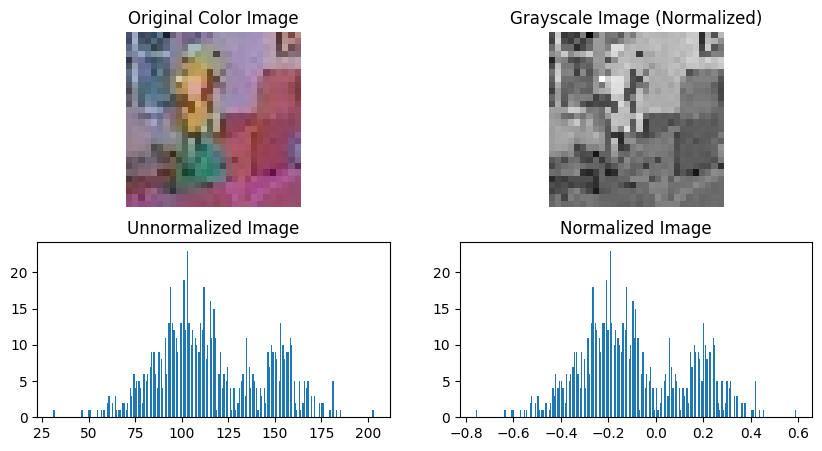

Original
[[(72, 82, 109), (158, 168, 193), (57, 69, 91), (63, 80, 98), (48, 73, 93), (98, 119, 138), (24, 30, 54), (105, 96, 123), (146, 125, 158), (120, 98, 134), (118, 103, 142), (94, 83, 123), (140, 124, 163), (122, 106, 143), (152, 142, 176), (158, 151, 182), (157, 148, 177), (156, 147, 178), (155, 144, 178), (160, 146, 182), (163, 146, 188), (164, 143, 182), (179, 154, 184), (185, 156, 174), (85, 51, 50), (178, 138, 130), (120, 72, 68), (191, 140, 137)], [(66, 75, 104), (164, 176, 202), (69, 84, 105), (56, 75, 92), (83, 106, 122), (58, 77, 94), (89, 97, 120), (136, 132, 159), (141, 126, 155), (115, 100, 129), (100, 97, 124), (114, 114, 138), (140, 130, 155), (146, 134, 158), (156, 148, 172), (153, 144, 171), (163, 152, 184), (161, 150, 184), (159, 147, 183), (162, 147, 186), (161, 144, 186), (170, 149, 188), (185, 160, 190), (184, 157, 174), (86, 54, 55), (183, 146, 140), (179, 138, 136), (158, 112, 112)], [(92, 103, 133), (142, 156, 183), (89, 107, 129), (87, 108, 125), (46, 66, 

In [84]:
#plot 4 random images
for i in random.sample(range(len(labels)), 4):
    for j in random.sample(range(len(img_data_color[i])), 1):
        plots_and_images(img_data_color[i][j],img_data_gray[i][j],img_data_gray_normalized[i][j])
        # print("Original")
        print(img_data_color[i][j])
        # print("Gray")
        print(img_data_gray[i][j])
        # print("Gray Normalized")
        print(img_data_gray_normalized[i][j])

# c

In [75]:
def load_data(file_path):
    """Load JSONL data from a file and return as a list of dictionaries."""
    data_samples = []
    with open(file_path, 'r') as file:
        for line in file:
            data_samples.append(json.loads(line))  # Parse each JSON line and add to list
    return data_samples

In [76]:
def create_dict(sentences):
    """Create a character-to-number dictionary from the given sentences."""
    all_text = ''.join(sentences)  # Combine all sentences into one string
    unique_chars = sorted(set(all_text))  # Get unique characters
    char_to_num = {char: index for index, char in enumerate(unique_chars)}
    return char_to_num

In [77]:
def tokenize_sentence(sentence, char_to_num):
    """Tokenize a given sentence using the character-to-number dictionary."""
    return [char_to_num[char] for char in sentence]  # List comprehension for tokenization

In [80]:
file_path = 'MLA2_DATA/MLA2_DATA/TEXT/train.jsonl'
data_samples = load_data(file_path)

# Collect sentences from the dataset
sentences = []
for sample in data_samples:
    sentences.append(sample['norm'])
    sentences.append(sample['situation'])
    sentences.append(sample['intention'])
char_to_num = create_dict(sentences)

# Tokenize each sentence
tokenized_sentences = {sentence: tokenize_sentence(sentence, char_to_num) for sentence in sentences}

In [81]:
# Print original and tokenized sentences for the selected samples
for sentence, tokenized in random.sample(list(tokenized_sentences.items()), 4):
    print("Original Sentence:")
    print(sentence)
    print("Tokenized Sentence:")
    print(tokenized)
    print()

Original Sentence:
Chris wants to consider chatting with his friend.
Tokenized Sentence:
[28, 61, 71, 62, 72, 0, 76, 54, 67, 73, 72, 0, 73, 68, 0, 56, 68, 67, 72, 62, 57, 58, 71, 0, 56, 61, 54, 73, 73, 62, 67, 60, 0, 76, 62, 73, 61, 0, 61, 62, 72, 0, 59, 71, 62, 58, 67, 57, 11]

Original Sentence:
It's nice to loan your tools to friends.
Tokenized Sentence:
[34, 73, 5, 72, 0, 67, 62, 56, 58, 0, 73, 68, 0, 65, 68, 54, 67, 0, 78, 68, 74, 71, 0, 73, 68, 68, 65, 72, 0, 73, 68, 0, 59, 71, 62, 58, 67, 57, 72, 11]

Original Sentence:
You should always park where it's appropriate.
Tokenized Sentence:
[50, 68, 74, 0, 72, 61, 68, 74, 65, 57, 0, 54, 65, 76, 54, 78, 72, 0, 69, 54, 71, 64, 0, 76, 61, 58, 71, 58, 0, 62, 73, 5, 72, 0, 54, 69, 69, 71, 68, 69, 71, 62, 54, 73, 58, 11]

Original Sentence:
Brian is hungry and goes to a restaurant to eat.
Tokenized Sentence:
[27, 71, 62, 54, 67, 0, 62, 72, 0, 61, 74, 67, 60, 71, 78, 0, 54, 67, 57, 0, 60, 68, 58, 72, 0, 73, 68, 0, 54, 0, 71, 58, 72, 73, 54,

In [119]:
def load_image_data(image_dir_path):
    image_class_folders = os.listdir(image_dir_path)
    image_class_folders_iter = iter(map(lambda folder: folder * (os.path.isdir(os.path.join(image_dir_path, folder))), image_class_folders))
    image_class_folders = list(filter(None, image_class_folders_iter))  # Get only valid folders
    
    # Load the data (file paths) for each class (folder)
    image_data = {}
    for class_folder in image_class_folders:
        image_data[class_folder] = list(map(lambda img_file: os.path.join(image_dir_path, class_folder, img_file), os.listdir(os.path.join(image_dir_path, class_folder))))
    for i in image_data.values():
        for j in range(len(i)):
            _,i[j] = preprocess_image(i[j])
    return image_data

# Text Data Loading - Classes derived from 'label' field in the JSON data


In [120]:
def load_text_data(file_path):
    with open(file_path, 'r') as file:
        data_samples = list(map(json.loads, file))  # Parse JSON lines
    
    # Tokenize sentences and extract labels as classes
    text_data = {}
    labels_iter = iter(map(lambda sample: sample['label'] * (sample['label'] in ['moral', 'immoral']), data_samples))
    labels = list(filter(None, labels_iter))  # Filter out invalid labels

    for label in labels:
        text_data[label] = list(map(lambda sample: sample['sentence'], filter(lambda sample: sample['label'] == label, data_samples)))
    
    return text_data

In [121]:
def load_data_general(data_type, data_path):
    is_image_data = data_type == 'image'
    
    # Use map and boolean logic to determine which function to call
    load_functions = iter([load_image_data, load_text_data])
    
    # Use map to apply the appropriate function based on the data type
    selected_data = list(map(lambda func: func(data_path), [load_image_data] * is_image_data + [load_text_data] * (not is_image_data)))
    
    return selected_data[0]  # Extract the result from the list


In [122]:
img_dir_path1 = "MLA2_DATA/MLA2_DATA/IMAGE"

In [130]:
x = load_data_general('image', img_dir_path1)

In [126]:
img_dir_path1.split('/')[2]

'IMAGE'

In [127]:
text_file_path = "MLA2_DATA/MLA2_DATA/TEXT/"

In [129]:
text_file_path.split('/')[2]

'TEXT'